# Historical Public Debt Data

## Scopo del progetto

## Dati


- Country Name 
- Year 
- Gross Government Debt 
- Gross Domestic Product 
- Debt to GDP Ratio

In [2]:
import pandas as pd
origin_df = pd.read_csv("HPDD_06-13-2016 19-49-43-03_timeSeries.csv")

In [3]:
def getCountries(df, countryLabel):
    if df.empty:
        print('DataFrame is empty!')
    elif countryLabel not in df.columns:
        print(countryLabel+' is not in DataFrame columns set!')
    else:
        df1 = df.drop_duplicates(subset=countryLabel, keep="last")
        df1 = df1.sort_values(countryLabel)
        return df1[countryLabel].tolist()
    return []

def getIndicator(df, indicatorLabel):
    if df.empty:
        print('DataFrame is empty!')
    elif indicatorLabel not in df.columns:
        print(indicatorLabel+' is not in DataFrame columns set!')
    else:
        df1 = df.drop_duplicates(subset=indicatorLabel, keep="last")
        return df1[indicatorLabel].tolist()
    return []

def countryHasIndicator(df, countryLabel, indicatorLabel):
    missing_indicators_dict = {}
    count = 0
    countries = getCountries(df, countryLabel) if getCountries(df, countryLabel) != [] else [] 
    indicators = getIndicator(df, indicatorLabel) if getIndicator(df, indicatorLabel) != [] else []
    for x in countries:
        missing_indicators_dict[x] = []
        for y in indicators:
            found = df[(df[countryLabel] == x) & (df[indicatorLabel] == y)]
            if found.empty:
                missing_indicators_dict[x].append(y)
                print(x+' has no indicator: '+y)
            else:
                count += 1
    if count == len(countries)*len(indicators):
        print('Every country has all the indicators!')
    else:
        print('Not all the countries are associated with every indicators!')
    return missing_indicators_dict

countries = getCountries(origin_df, 'Country Name')
indicators = getIndicator(origin_df, 'Indicator Name')
missing_indicators = countryHasIndicator(origin_df, 'Country Name', 'Indicator Name')

Afghanistan has no indicator: Gross Government Debt
Afghanistan has no indicator: Debt to GDP Ratio
Mongolia has no indicator: Gross Government Debt
Montserrat has no indicator: Gross Government Debt
Montserrat has no indicator: Debt to GDP Ratio
Palau has no indicator: Gross Government Debt
Palau has no indicator: Debt to GDP Ratio
Timor-Leste, Dem. Rep. of has no indicator: Gross Government Debt
Timor-Leste, Dem. Rep. of has no indicator: Debt to GDP Ratio
Not all the countries are associated with every indicators!


In [4]:
import random
nan_filling_list = [None] * 221
data_frames = {}
for country in countries: 
    temp_df = origin_df[(origin_df['Country Name'] == country) & 
                        ((origin_df['Indicator Name'] == 'Gross Government Debt') |
                         (origin_df['Indicator Name'] == 'Gross Domestic Product') |
                         (origin_df['Indicator Name'] == 'Debt to GDP Ratio'))]
    temp_df = temp_df[['Country Name','Indicator Name']].join(temp_df.loc[:,'1800':'2020'])
    
    if len(temp_df.index) < 3:
        for missing_indicator in missing_indicators[country]:
            index = random.randint(1,1000) # possible collision on index 
            temp_df.loc[index] = [country]+[missing_indicator]+nan_filling_list
    temp_df = temp_df.melt(id_vars=['Country Name','Indicator Name'], 
        var_name='Year', 
        value_name='Value')
    temp_df = temp_df.pivot_table('Value', ['Country Name', 'Year'], 'Indicator Name', dropna=False)
    #after pivoting need to reshape in standard form!
    flattened = pd.DataFrame(temp_df.to_records())
    data_frames[country] = flattened
merged_df = pd.concat(data_frames.values()).reset_index(drop=True)
final_df = merged_df[['Country Name','Year','Gross Government Debt','Gross Domestic Product','Debt to GDP Ratio']]
final_df

,Country Name,Year,Gross Government Debt,Gross Domestic Product,Debt to GDP Ratio
0,Afghanistan,1800,NaN,NaN,NaN
1,Afghanistan,1801,NaN,NaN,NaN
2,Afghanistan,1802,NaN,NaN,NaN
3,Afghanistan,1803,NaN,NaN,NaN
4,Afghanistan,1804,NaN,NaN,NaN
...,...,...,...,...,...
42648,Zimbabwe,2016,8.213449e+09,1.429194e+10,57.469094
42649,Zimbabwe,2017,8.745597e+09,1.499397e+10,58.327438
42650,Zimbabwe,2018,9.346885e+09,1.573589e+10,59.398521
42651,Zimbabwe,2019,9.889268e+09,1.660880e+10,59.542349


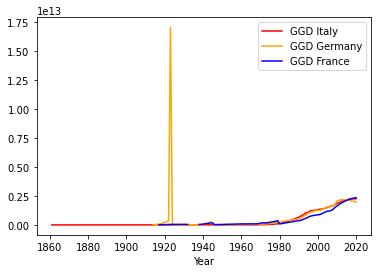

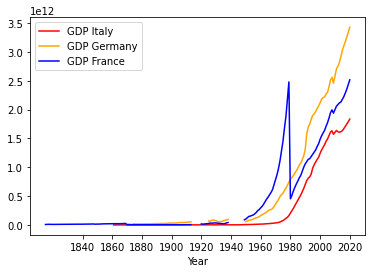

In [19]:
import matplotlib.pyplot as plt

# GGD
ax = data_frames['Italy'].plot(x='Year',y='Gross Government Debt',kind='line', color='red')
ay = data_frames['Germany'].plot(x='Year',y='Gross Government Debt',kind='line', ax=ax, color='orange')
data_frames['France'].plot(x='Year',y='Gross Government Debt',kind='line', ax=ay, color='blue')
ax.legend(['GGD Italy','GGD Germany','GGD France'])

# GDP
ax = data_frames['Italy'].plot(x='Year',y='Gross Domestic Product',kind='line', color='red')
ay = data_frames['Germany'].plot(x='Year',y='Gross Domestic Product',kind='line', ax=ax, color='orange')
data_frames['France'].plot(x='Year',y='Gross Domestic Product',kind='line', ax=ay, color='blue')
ax.legend(['GDP Italy','GDP Germany','GDP France'])

In [31]:
final_df['ChangeGGD'] = final_df['Gross Government Debt'].pct_change() * 100
final_df['ChangeGDP'] = final_df['Gross Domestic Product'].pct_change() * 100
final_df

<ipython-input-31-e090a5f15b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['ChangeGGD'] = final_df['Gross Government Debt'].pct_change() * 100
<ipython-input-31-e090a5f15b11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['ChangeGDP'] = final_df['Gross Domestic Product'].pct_change() * 100


,Country Name,Year,Gross Government Debt,Gross Domestic Product,Debt to GDP Ratio,ChangeGGD,ChangeGDP
0,Afghanistan,1800,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1801,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1802,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1803,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1804,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
42648,Zimbabwe,2016,8.213449e+09,1.429194e+10,57.469094,-14.752764,2.783997
42649,Zimbabwe,2017,8.745597e+09,1.499397e+10,58.327438,6.478980,4.912039
42650,Zimbabwe,2018,9.346885e+09,1.573589e+10,59.398521,6.875327,4.948136
42651,Zimbabwe,2019,9.889268e+09,1.660880e+10,59.542349,5.802824,5.547251


<AxesSubplot:xlabel='Gross Domestic Product', ylabel='Gross Government Debt'>

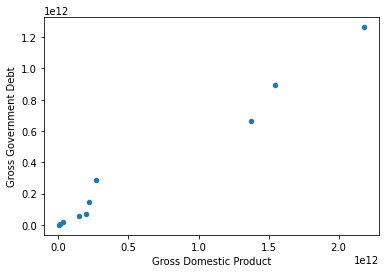

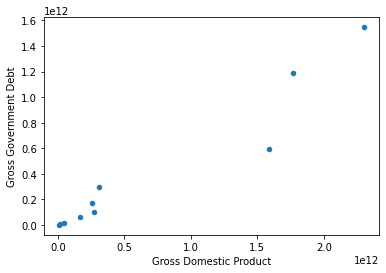

In [44]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
eu_data_frames = [data_frames[key] for key in data_frames if key in eu_countries]

# Scatter plot 2001
scatter_list_2001 = []
for var in range(0,10):
    curr_df = eu_data_frames[var]
    curr_df = curr_df[(curr_df['Year'] == '2001')]
    scatter_list_2001.append(curr_df)
scatter_merged_df_2001 = pd.concat(scatter_list_2001).reset_index(drop=True)
scatter_merged_df_2001.plot(x='Gross Domestic Product',y='Gross Government Debt',kind='scatter')
# Scatter plot 2005
scatter_list_2005 = []
for var in range(0,10):
    curr_df = eu_data_frames[var]
    curr_df = curr_df[(curr_df['Year'] == '2005')]
    scatter_list_2005.append(curr_df)
scatter_merged_df_2005 = pd.concat(scatter_list_2005).reset_index(drop=True)
scatter_merged_df_2005.plot(x='Gross Domestic Product',y='Gross Government Debt',kind='scatter')